## More Webscraping Functions


In [3]:
headers = {'user-agent': 'CSC-301,Bam,Eve Jimenez'}

In [4]:
import requests
from bs4 import BeautifulSoup
page = requests.get('https://en.wikipedia.org/wiki/Eastern_Connecticut_State_University', headers = headers)
soup = BeautifulSoup(page.content)

In [5]:
soup.h1.text

'Eastern Connecticut State University'

In [6]:
""" Get the headers """
h=soup.find_all("h2")

for h2 in h:
    h2t = h2.text
    h2t = h2t.replace('[edit]','')
    print(h2t)

Contents
History
Academics
Institute for Sustainable Energy
Housing
Student organizations
Athletics
Campus
Notable alumni
See also
References
External links
Navigation menu


In [7]:
""" elements within the table """
table = soup.find('table', {'class':'infobox vcard'})

trs = table.find_all('tr')

len(trs)

17

## Scraping WIkipedia
 From the right side of the table get the date the school was established and total number of undergraduate students



In [8]:
def tr_with_established(elem) :
    return elem.name == 'tr' and 'Established' in elem.get_text()

soup.find(tr_with_established)

year = soup.find(tr_with_established).text
year = year.replace('Established','')

def tr_with_students(elem) :
    return elem.name == 'tr' and 'Undergraduates' in elem.get_text()

students = soup.find(tr_with_students).text

students = students.replace('Undergraduates','').replace(' (full-time)','')
students

print("Date the university was established: " + year,
     "\nThe total number of undergraduate students: " + students)

istudents = int(students.replace(',',''))
print("For integer number of undergraduate students: ", istudents)



Date the university was established: 1889 
The total number of undergraduate students: 4,420
For integer number of undergraduate students:  4420


### Multiple Wikis

In [11]:
school_links = ['https://en.wikipedia.org/wiki/Eastern_Connecticut_State_University', 
                'https://en.wikipedia.org/wiki/Southern_Connecticut_State_University',
                'https://en.wikipedia.org/wiki/Western_Connecticut_State_University',
                'https://en.wikipedia.org/wiki/Central_Connecticut_State_University']

import time
schools=[]
undergradstu = []
for a in school_links:
    page = requests.get(a)

    if page.status_code != requests.codes.ok :
        print("Request was not successful, status code:", page.status_code)
        print("Hit enter to continue...")
        input()
        exit()    
    soup = BeautifulSoup(page.content, 'html.parser')
    schools.append(soup.h1.text)
    undergradstu.append(soup.find(tr_with_students).text)
    time.sleep(1)


nickname = []
for i in schools:
    newer = i.split(" ")
    nickname.append(newer[0])


underg=[]
for stu in undergradstu:
    undergradstu = int(stu.replace('Undergraduates','').replace(' (full-time)','').replace(',',''))
    underg.append(undergradstu)
    
print(nickname, underg)

['Eastern', 'Southern', 'Western', 'Central'] [4420, 8496, 5952, 9546]


### Panda dataframe

Text(0, 0.5, 'Number of Students')

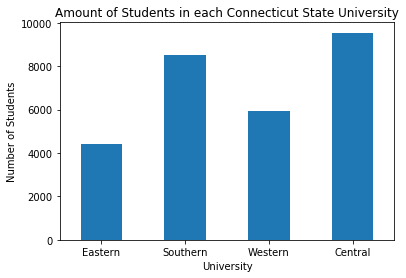

In [13]:
import pandas as pd

# run it again if it doesn't work

df= pd.DataFrame(data = {"School_Name":nickname, "Students":underg})
df

plt = df.plot.bar(x = "School_Name", y = "Students", 
            title = "Amount of Students in each Connecticut State University",
            legend = False, rot = 0.0)

plt.set_xlabel("University")
plt.set_ylabel("Number of Students")

## Scrape the university catalog

Enter a computer science course 
Example: 'CSC' (If this is done it gets all the courses)
<p>
'CSC 2' (This gets all the courses that are 200)
            </p><p>
    'CSC 201' (Gets the specific course)</p>

In [20]:
page = requests.get('https://ssb-prod.ec.easternct.edu/PROD/bwckctlg.p_display_courses?term_in=999999&one_subj=CSC&sel_subj=&sel_crse_strt=&sel_crse_end=&sel_title=&sel_levl=&sel_schd=&sel_coll=&sel_divs=&sel_dept=&sel_from_cred=&sel_to_cred=&sel_attr=', headers = headers)
soup = BeautifulSoup(page.content)

In [21]:
newentry = input("Enter the name of a course: ").upper()

classes = soup.find_all('td',{'class':'nttitle'})
c=[]
for i in classes:
    c.append(i.text)
compsci=[]

for j in c:
    if newentry in j:
        compsci.append(j)

compsci

Enter the name of a course: CSC


['CSC 100 - Computer Concepts',
 'CSC 101 - Intro to Computer Science',
 'CSC 110 - Intro to Computing/Prob Solv',
 'CSC 180 - Fundamentals of Computing',
 'CSC 1XX - Computer Science Elective',
 'CSC 200 - Management Systems',
 'CSC 201 - Intro To Mechtronics w/Labview',
 'CSC 202 - Intro to Prog/Machine Intel',
 'CSC 203 - Adv Programming/Data Science',
 'CSC 210 - Computer Sci And Programming I',
 'CSC 212 - Comp. Game Design & Visualizat',
 'CSC 215 - Intro To Web Development',
 'CSC 220 - Visualizing for VisualThinking',
 'CSC 225 - Human-Comp Interaction & Appl.',
 'CSC 230 - Discrete Math for Computer Sci',
 'CSC 231 - Computer Sci And Program II',
 'CSC 249 - Visual Basic.NET',
 'CSC 250 - Applied Computing In Education',
 'CSC 251 - Net-centric Computing',
 'CSC 259 - Adv Programming In Visual Bsic',
 'CSC 269 - Topics In Computer Languages',
 'CSC 270 - Data Structures',
 'CSC 2XX - Computer Science Elective',
 'CSC 301 - Adv Web Develop & Scraping',
 'CSC 305 - Data Mining a

## Coronvirus Website Scraping

Pull data from the table

In [22]:
page = requests.get('https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html', headers = headers)
soup = BeautifulSoup(page.content)

#Last Updated

soup.find('time',{'class':'css-wcxsge'}).text

'Updated May 7, 2020, 6:50 P.M. E.T.'

In [23]:
#They changed the website

soup.prettify
state=[]
cases=[]

casetable = soup.find('table', {'class':'svelte-8im85e'})
ctrs=casetable.find_all('tr')


for rows in ctrs[1::] :
    state.append(rows.find('td',{'class':'state svelte-8im85e'}).text)
    cases.append(int(rows.find('td',{'class':'cases svelte-8im85e'}).text.replace(',',''))) #changes to integer

cases = cases[0:10]

newstate=[]
for n in state:
    a = n.replace("+ \n",'').replace("MAP »",'')  
    newstate.append(a.strip())
newstate = newstate[0:10]
print(newstate,cases)

AttributeError: 'NoneType' object has no attribute 'find_all'

In [24]:
import pandas as pd
#if only text shows up for the first run, run it again

df= pd.DataFrame(data = {"State":newstate, "Case":cases})
df

plt = df.plot.bar(x = "State", y = "Case", 
            title = "Top 10 States with the Most Number of Corona Cases",
            legend = False, rot = 0.0)

plt.set_xlabel("States")
plt.set_ylabel("Number of Cases")

NameError: name 'newstate' is not defined

## Selenium

This automates the process of scheduling an apointment. Person needs to change the calendly person name. That can be an added function I can add to the program to make it more user friendly in the future 

In [25]:
date = '2020-04-10'
times = '10:20am'

a = date.split('-')
month= a[0]+'-'+a[1]
month

'2020-04'

from selenium import webdriver

import time
from selenium.webdriver.common.keys import Keys

driver = webdriver.Firefox(executable_path='C:\geckodriver.exe')

##driver.get(PUT CALENDLY WEBSITE HERE)
driver.get(https://calendly.com/[PERSON]/office-hours?month='+month+'&date='+date)

wow = driver.find_element_by_xpath("//div[button/@data-start-time]")
check = wow.text

store = times in check
store

if store == True:
    
    wow.click()

    confirm = driver.find_element_by_xpath('//button[@data-container="confirm-button"]')
    confirm.click()
    time.sleep(2)

    elem = driver.find_element_by_name("full_name")
    elem.send_keys("Eve Jimenez") 

    elem2 = driver.find_element_by_name("email")
    elem2.send_keys("jimenezsagasteguib@easternct.edu")

    message= 'Fake appointment for CSC 301, Exam II.'

    elem3 = driver.find_element_by_name("question_0")
    elem3.send_keys(message)
    
    submit = driver.find_element_by_xpath('//button[@type="submit"]')
    submit.click()
    print("Successfully scheduled your appointment on: " + date +" at " +times)
    driver.close

else:
    print("All appointments at this date/time are booked. Please indicate another time")
    driver.close()
    
